<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Deteksi Dini Penyakit Diabetes Menggunakan Algoritma Neural Network Berbasiskan Algoritma Genetika
<center><br><font size="5"><font face="calibri"><strong>Pima Indians Diabetes Dataset by UCI Machine Learning
<br><strong>Oleh :
<br>
<br><strong>AYU MEILINDA
<br><strong>09011181722019
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

# Berdasarkan pada jurnal "Deteksi Dini Penyakit Diabetes Menggunakan Algoritma Neural Network Berbasiskan Algoritma Genetika" dan menggunakan Pima Indians Diabetes Dataset by UCI Machine Learning

## IMPORT PACKAGES 
Berikut ini adalah paket-paket yang digunakan antara lain :

Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

Paket sklearn.utils

Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. NumPy juga dapat digunakan sebagai wadah data generik multidimensi yang efisien. Hal ini memungkinkan NumPy untuk terintegrasi dengan mudah dan cepat dengan berbagai macam database.

Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python. 

Seaborn adalah library untuk membuat grafik statistik dengan Python. Ini dibangun di atas matplotlib dan terintegrasi dengan struktur data pandas.

Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.

In [1]:
#memanggil library yang akan digunakan
from keras.models import Sequential #library untuk model lapisan bertumpuk
from keras.layers import Dense  #untuk menambahkan layer
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler #mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan
import numpy as np#untuk komputasi array
np.random.seed(7)
import pandas as pd #mengelolah data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #membagikan data

C:\Users\Ayu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## IMPORT DATASET
Dataset yang dugunakan dalam hal ini adalah breast-cancer-wisconsin by UCI Machine Learning.

In [2]:
dataset = pd.read_csv ("diabetes.csv")
feature = np.array(dataset.ix[:, 0:8])
label = np.array(dataset.ix[:,8])

C:\Users\Ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Ayu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dataset.head() #head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.Outcome.value_counts() #untuk mengetahui jumlah 0 dan 1 pada kolom Outcome

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
dataset.describe() #berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata. median, dan lain sebagainnya pada kolom

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## ATTRIBUTE
Atribut yang terdapat berdasarkan Pima Indians Diabetes Dataset adalah sebagai berikut : <br>

|  No. |             Attribute          | Domain  | 
|------|--------------------------------|---------|
|  1. |  Pregnancies                    | [1-20]  |
|  2. |  Glucose                        | [1-200] |             
|  3. |  BloodPressure                  | [1-200] |
|  4. |  SkinThickness                  | [1-100] |          
|  5. |  Insulin                        | [1-1000]|
|  6. |  BMI                            | [1-100] |
|  7. |  DiabetesPedigreeFunction       | [1-10]  |
|  8. |  Age                            | [1-100] |
|  9. |  Outcome                        | [1 for positive], [2 for negative]|

In [6]:
negative = dataset[dataset.Outcome==0]

In [7]:
positive = dataset[dataset.Outcome==1]

## HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

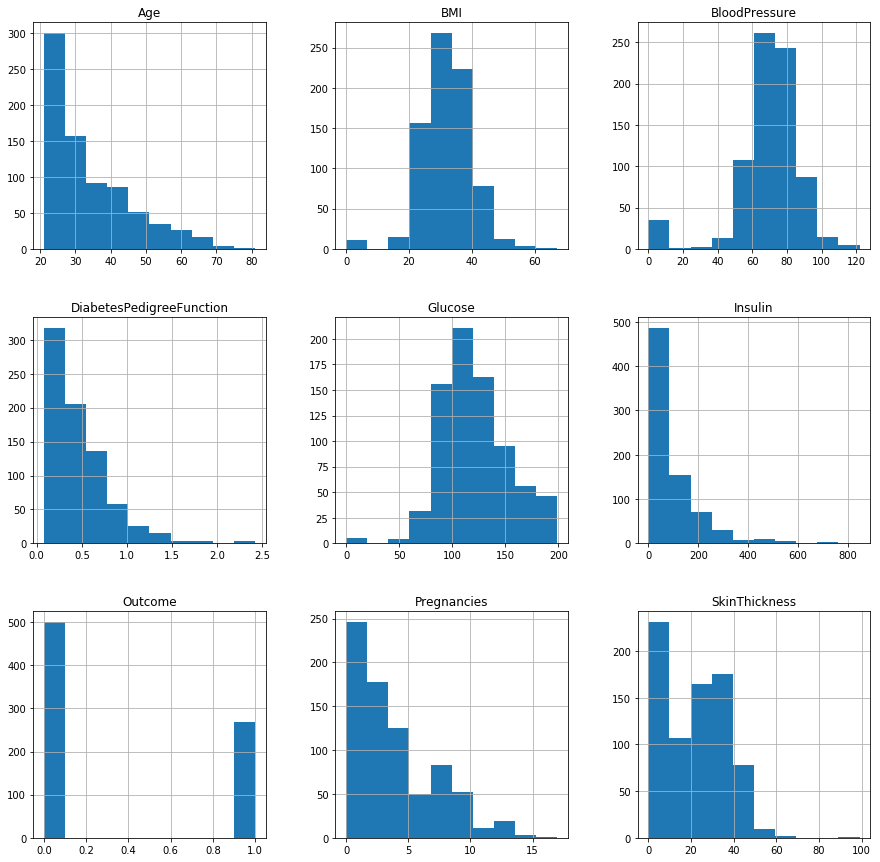

In [8]:
dataset.hist(figsize=(15,15))
plt.show()

## BOX PLOT
Penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

Pregnancies                    AxesSubplot(0.125,0.821923;0.352273x0.0580769)
Glucose                     AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
BloodPressure                  AxesSubplot(0.125,0.752231;0.352273x0.0580769)
SkinThickness               AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
Insulin                        AxesSubplot(0.125,0.682538;0.352273x0.0580769)
BMI                         AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
DiabetesPedigreeFunction       AxesSubplot(0.125,0.612846;0.352273x0.0580769)
Age                         AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
Outcome                        AxesSubplot(0.125,0.543154;0.352273x0.0580769)
dtype: object

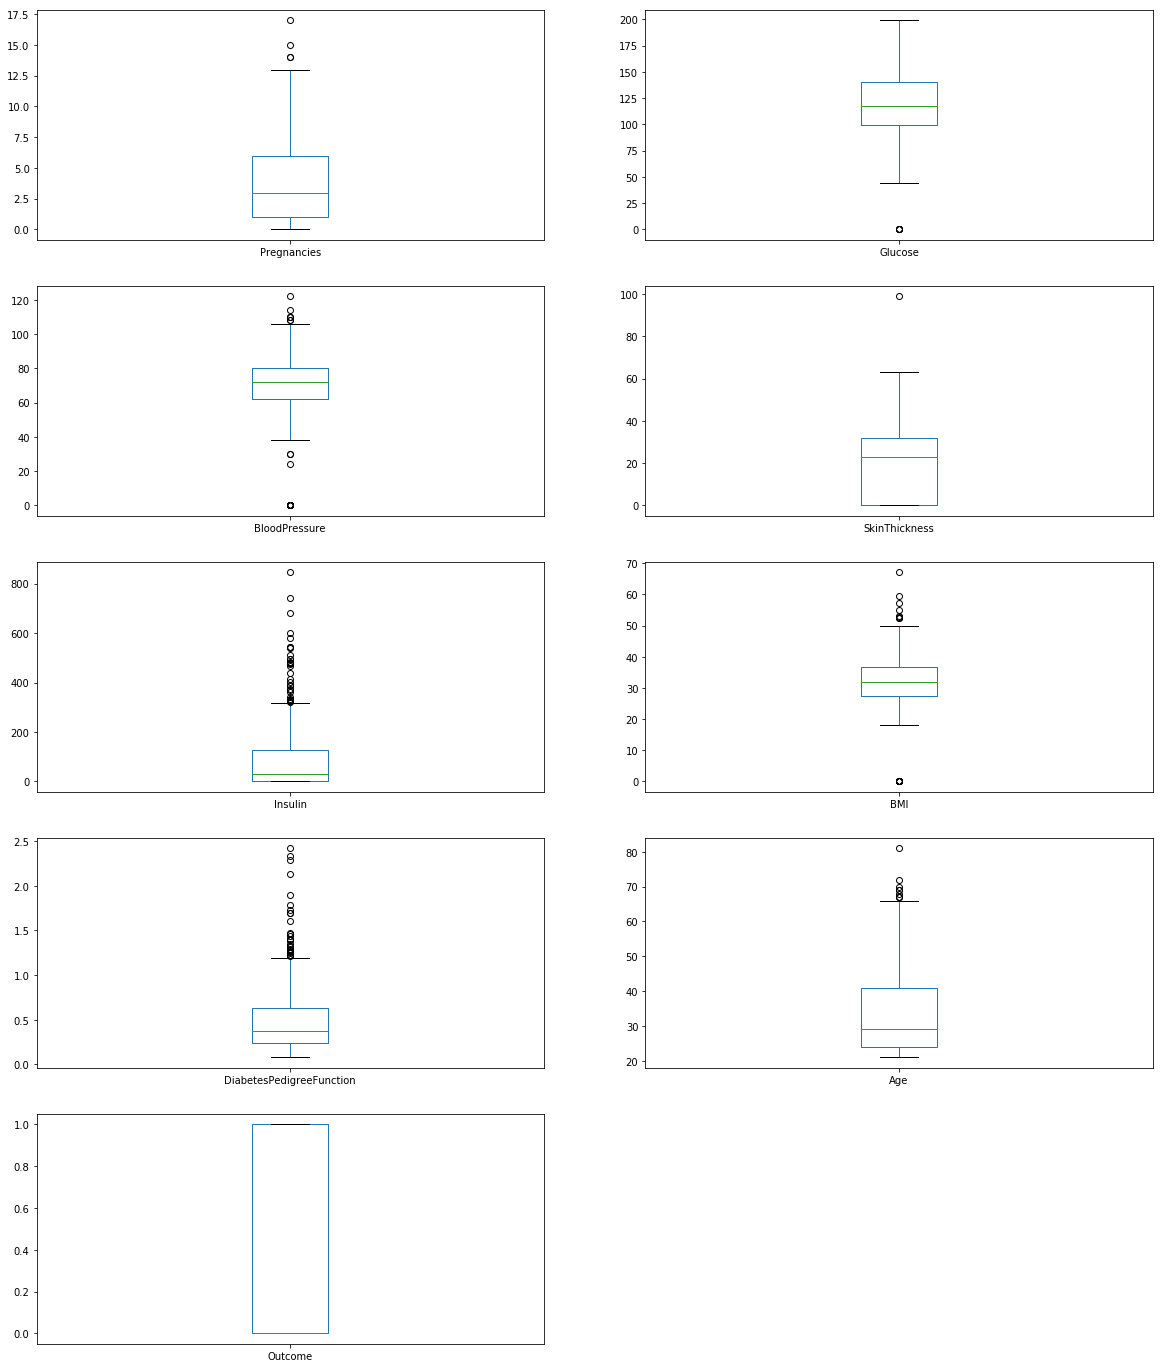

In [9]:
dataset.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(20,55))

## FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [11]:
feature_scaled=scaler.fit_transform(feature)

In [12]:
feature_scaled.shape

(768, 8)

In [13]:
print(label)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [14]:
#melakukan scaling dataset
from keras.utils.np_utils import to_categorical
scaler = MinMaxScaler() #mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan

label_categorical=to_categorical(label)
label_categorical.shape

(768, 2)

In [15]:
f_train, f_test, l_train, l_test = train_test_split(feature_scaled, label_categorical, train_size=0.8, test_size=0.2, random_state=4)

In [16]:
l_real=l_test

In [17]:
print('Train data shape: ', f_train.shape, l_train.shape)
print('Test data shape: ', f_test.shape, l_test.shape)

Train data shape:  (614, 8) (614, 2)
Test data shape:  (154, 8) (154, 2)


In [18]:
classes = np.unique(l_train)
nClasses = len(classes)
print('Total number of outputs: ', classes)
print('Output Classes : ', nClasses)

Total number of outputs:  [0. 1.]
Output Classes :  2


## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=8, input_dim=8, activation='relu'))

In [21]:
model.add(Dense(units=17, activation='relu'))

In [22]:
model.add(Dense(units=16, activation='relu'))

In [23]:
model.add(Dense(units=2, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 17)                153       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                288       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

In [25]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [26]:
history=model.fit(feature_scaled, label_categorical,epochs=100, batch_size=25, validation_split=0.2)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 482us/step - loss: 0.6914 - acc: 0.5098 - val_loss: 0.6909 - val_acc: 0.5260
Epoch 2/100
614/614 [==============================] - 0s 125us/step - loss: 0.6901 - acc: 0.6099 - val_loss: 0.6896 - val_acc: 0.6818
Epoch 3/100
614/614 [==============================] - 0s 150us/step - loss: 0.6886 - acc: 0.6669 - val_loss: 0.6884 - val_acc: 0.6558
Epoch 4/100
614/614 [==============================] - 0s 99us/step - loss: 0.6872 - acc: 0.6539 - val_loss: 0.6871 - val_acc: 0.6429
Epoch 5/100
614/614 [==============================] - 0s 81us/step - loss: 0.6856 - acc: 0.6547 - val_loss: 0.6859 - val_acc: 0.6429
Epoch 6/100
614/614 [==============================] - 0s 83us/step - loss: 0.6840 - acc: 0.6531 - val_loss: 0.6844 - val_acc: 0.6429
Epoch 7/100
614/614 [==============================] - 0s 85us/step - loss: 0.6822 - acc: 0.6523 - val_loss: 0.6831 - val_acc: 0.6429
Epoch 8/100
6

614/614 [==============================] - 0s 104us/step - loss: 0.6207 - acc: 0.6531 - val_loss: 0.6261 - val_acc: 0.6429
Epoch 62/100
614/614 [==============================] - 0s 109us/step - loss: 0.6198 - acc: 0.6531 - val_loss: 0.6253 - val_acc: 0.6429
Epoch 63/100
614/614 [==============================] - 0s 93us/step - loss: 0.6185 - acc: 0.6531 - val_loss: 0.6240 - val_acc: 0.6429
Epoch 64/100
614/614 [==============================] - 0s 75us/step - loss: 0.6174 - acc: 0.6531 - val_loss: 0.6228 - val_acc: 0.6429
Epoch 65/100
614/614 [==============================] - 0s 91us/step - loss: 0.6163 - acc: 0.6531 - val_loss: 0.6216 - val_acc: 0.6429
Epoch 66/100
614/614 [==============================] - 0s 98us/step - loss: 0.6153 - acc: 0.6531 - val_loss: 0.6203 - val_acc: 0.6429
Epoch 67/100
614/614 [==============================] - 0s 112us/step - loss: 0.6142 - acc: 0.6539 - val_loss: 0.6191 - val_acc: 0.6429
Epoch 68/100
614/614 [==============================] - 0s 85us/s

Berikut ini adalah tampilan prediksi data.

In [27]:
predict = model.predict(feature_scaled)
predict

array([[0.53730595, 0.4622049 ],
       [0.7339641 , 0.22931278],
       [0.49636012, 0.5237528 ],
       ...,
       [0.6208495 , 0.36571258],
       [0.56472623, 0.4359883 ],
       [0.75242126, 0.20845336]], dtype=float32)

## ACCURACY 
Berikut ini akan ditampilkan nilai akurasi dan dalam hal ini akurasinya mencapai 65.10%.

In [28]:
scores = model.evaluate(feature_scaled, label_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 35us/step

acc: 70.90%


In [29]:
print(scores[1]) #Mencetak nilai akurasi.

0.708984375


## CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [30]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(label_categorical.argmax(axis=1), predict.argmax(axis=1))

In [31]:
ConfusionMatrix

array([[469,  31],
       [190,  78]], dtype=int64)

In [32]:
accuracy = ((448+228) / (448+12+11+228))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 96.71%


In [33]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )

<Figure size 432x288 with 0 Axes>

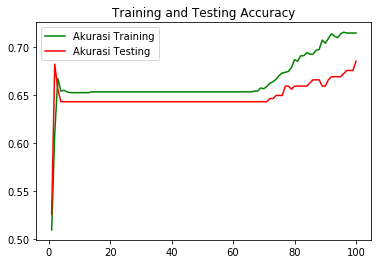

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(epochs, acc, 'g' , color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', color='red', label='Akurasi Testing')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

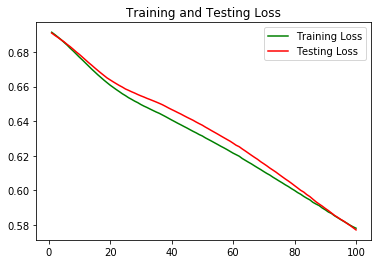

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(epochs, loss, 'g' , color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'r', color='red', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.figure()

In [37]:
accuracy = ((446+234) / (446+12+7+234))
presisi = ((446) / (446+7))
recall = ((446) / (12+446))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))
print("\n%s: %.2f%%" % ("Presisi", presisi*100))
print("\n%s: %.2f%%" % ("recall", recall*100))


Accuracy: 97.28%

Presisi: 98.45%

recall: 97.38%
